# Quick Tour

<a target="_blank" href="https://colab.research.google.com/github/lavague-ai/LaVague/blob/main/docs/docs/get-started/quick-tour-notebook/quick-tour.ipynb">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>

## Pre-requisites

**Note**: We use OpenAI's models, for the embedding, LLM and Vision model. You will need to set the OPENAI_API_KEY variable in your local environment with a valid API key for this example to work.

If you don't have an OpenAI API key, please get one here: https://platform.openai.com/docs/quickstart/developer-quickstart

# Installation

We start by download LaVague.

In [1]:
!pip install lavague

We will need to set our OpenAI Key as a Colab secret (see the key icon on the left-hand side of the Colab notebook) named 'OPENAI_API_KEY' and then convert it to an environment variable with the same name.

In [5]:
import os

# Check if running in Google Colab
try:
    from google.colab import userdata
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
else:
    os.environ["OPENAI_API_KEY"] = os.getenv('OPENAI_API_KEY')

## ActionEngine

**An WebAgent is made up of two components: an `ActionEngine` and a `WorldModel`.**

Let's start by initializing an `ActionEngine`, which is responsible for generating automation code for text instructions and executing them.

In [ ]:
from lavague.core import ActionEngine
from lavague.drivers.selenium import SeleniumDriver

selenium_driver = SeleniumDriver()
action_engine = ActionEngine(selenium_driver)

# World model

Next, we will initialize our `WorldModel`, providing it with examples of global objectives for actions and the desired thought process and reasoning we wish it to replicate to generate the next instruction that needs to be passed to the `ActionEngine`.

In [ ]:
from lavague.core import WorldModel

world_model = WorldModel.from_hub("hf_example")

# WebAgent Demo

We can now use these two elements to initialize a `WebAgent` and start playing with it!

In the following example, we show how our agent can achieve a user-defined goal, here going on the quicktour of Hugging Face's PEFT framework for model finetuning.

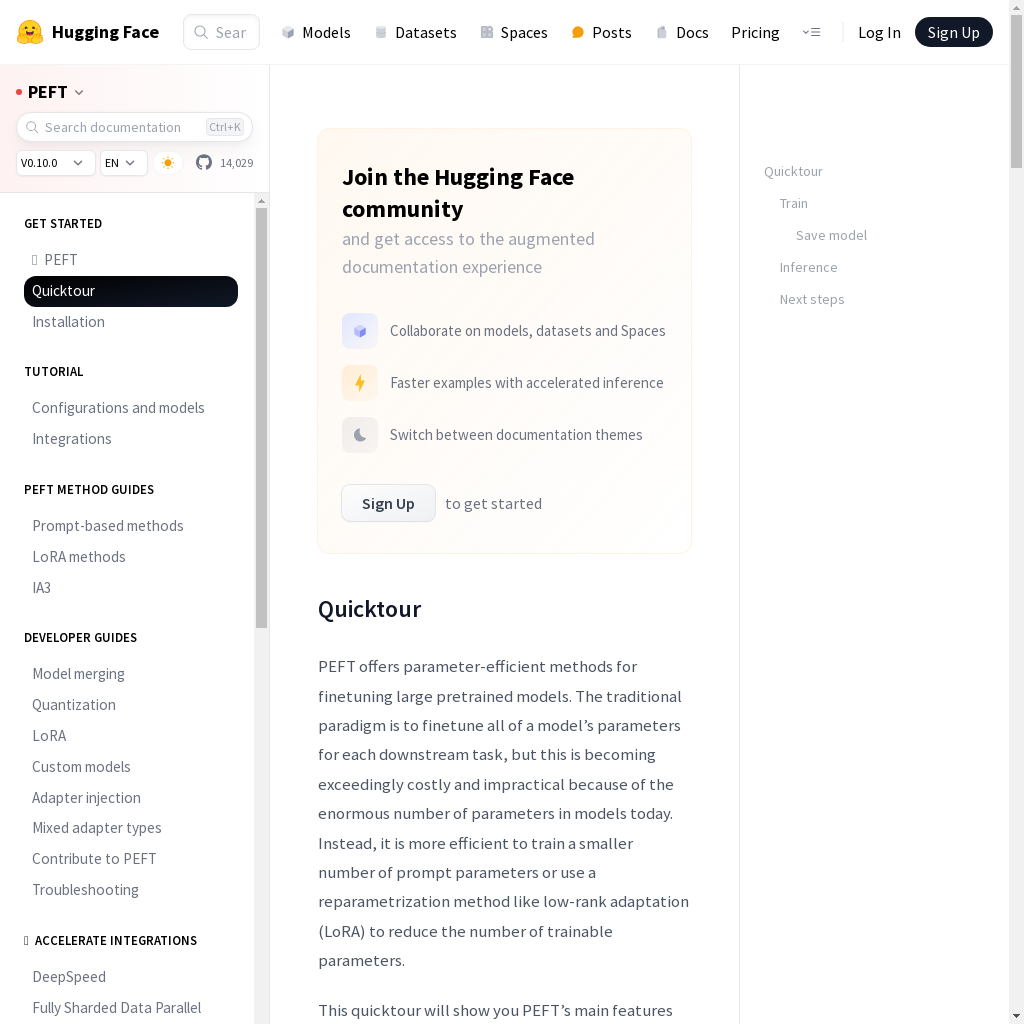

Computing an action plan...
Thoughts: Thoughts:
- The current screenshot shows the documentation page for PEFT on the Hugging Face website.
- The left sidebar clearly lists "Quicktour" under the "GET STARTED" section, which is already highlighted.
- The main content area on the right side of the page is displaying the "Quicktour" section of PEFT.
- The content includes headings like "Train", "Save model", "Inference", and "Next steps", which are part of the quicktour.
- Since the objective is to go on the quicktour of PEFT and the page is already displaying this information, no further navigation or action is required.

Instruction: STOP
Objective reached


In [ ]:
from lavague.core import WebAgent

agent = WebAgent(action_engine, world_model)

agent.get("https://huggingface.co/docs")
agent.run("Go on the quicktour of PEFT")